In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as

In [ ]:
import pandas as pd

In [ ]:
car = pd.read_csv('/content/Cleaned Car.csv')
backup = car.copy()

1.Display Top 5 Rows of The Dataset

In [ ]:
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,company
0,Maruti Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti
1,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti
4,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi


2.Check Last 5 Rows of The Dataset

In [ ]:
car.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,company
918,Volkswagen Jetta 2007-2011,Pune,2014,64889,Diesel,Automatic,First,15.50,1896,5,11.50,Volkswagen
919,Porsche Cayman 2009-2012,Hyderabad,2010,10000,Petrol,Manual,First,9.00,3436,2,40.00,Porsche
920,Hyundai Creta 1.6,Kolkata,2015,43000,Diesel,Manual,First,19.67,1582,5,9.25,Hyundai
921,Skoda Fabia 1.2,Pune,2011,47490,Petrol,Manual,First,17.50,1198,5,2.29,Skoda
922,Ford EcoSport 1.5,Chennai,2015,80000,Diesel,Manual,First,22.77,1498,5,7.00,Ford


3.Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
car.shape

(923, 12)

In [ ]:
print("Number of Rows",car.shape[0])
print("Number of Columns",car.shape[1])

Number of Rows 923
Number of Columns 12


4.Get Information About Our Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               923 non-null    object 
 1   Location           923 non-null    object 
 2   Year               923 non-null    int64  
 3   Kilometers_Driven  923 non-null    int64  
 4   Fuel_Type          923 non-null    object 
 5   Transmission       923 non-null    object 
 6   Owner_Type         923 non-null    object 
 7   Mileage            923 non-null    float64
 8   Engine             923 non-null    int64  
 9   Seats              923 non-null    int64  
 10  Price              923 non-null    float64
 11  company            923 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 86.7+ KB


5.Check Null Values In The Dataset

In [ ]:
car.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Seats                0
Price                0
company              0
dtype: int64

6.Get Overall Statistics About The Dataset

In [ ]:
car.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,2013.279523,58751.911159,17.922210,1651.234020,5.291441,10.411777
std,3.289351,44747.913302,4.526692,610.190527,0.854110,11.764734
min,2000.000000,1000.000000,0.000000,624.000000,2.000000,0.550000
25%,2011.000000,34239.500000,15.040000,1198.000000,5.000000,3.375000
50%,2014.000000,53000.000000,17.900000,1497.000000,5.000000,5.950000
75%,2016.000000,73872.500000,20.770000,1995.000000,5.000000,11.760000
max,2019.000000,775000.000000,28.400000,5461.000000,10.000000,75.000000


## Model
- Linear Regression
- random forest
- Navie bays



In [ ]:
x = car.drop(columns='Price')
y = car['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe = OneHotEncoder()
ohe.fit(x[['Name','Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'company']])

OneHotEncoder()

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'company']),remainder="passthrough")

**Linear Regression**

In [ ]:
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)
r2_score(Y_test,y_pred)

0.7809464059599327

In [ ]:
pipe.predict(pd.DataFrame([['Hyundai i20 Sportz','Ahmedabad',2015,110000,'Diesel','Manual','First', 20.00, 	1400,	5,'Hyundai']],columns=['Name',	'Location',	'Year',	'Kilometers_Driven',	'Fuel_Type',	'Transmission',	'Owner_Type',	'Mileage',	'Engine',	'Seats',	'company']))

array([7.12992952])

In [ ]:
#for slection of car object
pipe.steps[0][1].transformers[0][1].categories[1]

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype=object)

**Random Forest**

In [ ]:
reg = RandomForestRegressor()
pipe_reg = make_pipeline(column_trans,reg)
pipe_reg.fit(X_train,Y_train)
y_pred_reg = pipe_reg.predict(X_test)
r2_score(Y_test,y_pred_reg)

0.8651505502168243

In [ ]:
pipe.predict(pd.DataFrame([['Hyundai i20 Sportz','Ahmedabad',2015,110000,'Diesel','Manual','First', 20.00, 	1400,	5,'Hyundai']],columns=['Name',	'Location',	'Year',	'Kilometers_Driven',	'Fuel_Type',	'Transmission',	'Owner_Type',	'Mileage',	'Engine',	'Seats',	'company']))

array([7.12992952])

In [ ]:
#for slection of car object
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 35', 'Audi A4 2.0', 'Audi A4 3.0', 'Audi A4 New',
       'Audi A6 2.0', 'Audi A6 2.7', 'Audi A6 2011-2015', 'Audi A6 3.0',
       'Audi A6 35', 'Audi A8 L', 'Audi Q3 2.0', 'Audi Q3 2012-2015',
       'Audi Q3 35', 'Audi Q5 2008-2012', 'Audi Q5 30', 'Audi Q7 3.0',
       'Audi Q7 4.2', 'Audi Q7 45', 'Audi RS5 Coupe', 'Audi TT 2.0',
       'Audi TT 40', 'BMW 1 Series', 'BMW 3 Series', 'BMW 5 Series',
       'BMW 6 Series', 'BMW X1 sDrive', 'BMW X1 sDrive20d',
       'BMW X3 xDrive30d', 'BMW X5 2014-2019', 'BMW X5 3.0d',
       'BMW X5 xDrive', 'Chevrolet Aveo 1.4', 'Chevrolet Aveo U-VA',
       'Chevrolet Beat Diesel', 'Chevrolet Beat LS', 'Chevrolet Beat LT',
       'Chevrolet Beat Option', 'Chevrolet Cruze LTZ',
       'Chevrolet Enjoy 1.4', 'Chevrolet Enjoy TCDi',
       'Chevrolet Optra Magnum', 'Chevrolet Sail Hatchback',
       'Chevrolet Spark 1.0', 'Datsun GO NXT', 'Datsun GO Plus',
       'Datsun redi-GO T', 'Fiat Grande Punto', 'Fiat Linea Emotion',
       'Fiat

**Naive Bayes**

In [ ]:
NB = GaussianNB()
pipe_NB = make_pipeline(column_trans,reg)
pipe_NB.fit(X_train,Y_train)
y_pred_NB = pipe_NB.predict(X_test)
r2_score(Y_test,y_pred_NB)

0.8654444504137069

In [ ]:
pipe.predict(pd.DataFrame([['Hyundai i20 Sportz','Ahmedabad',2015,110000,'Diesel','Manual','First', 20.00, 	1400,	5,'Hyundai']],columns=['Name',	'Location',	'Year',	'Kilometers_Driven',	'Fuel_Type',	'Transmission',	'Owner_Type',	'Mileage',	'Engine',	'Seats',	'company']))

array([7.12992952])

In [ ]:
#for slection of car object
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 35', 'Audi A4 2.0', 'Audi A4 3.0', 'Audi A4 New',
       'Audi A6 2.0', 'Audi A6 2.7', 'Audi A6 2011-2015', 'Audi A6 3.0',
       'Audi A6 35', 'Audi A8 L', 'Audi Q3 2.0', 'Audi Q3 2012-2015',
       'Audi Q3 35', 'Audi Q5 2008-2012', 'Audi Q5 30', 'Audi Q7 3.0',
       'Audi Q7 4.2', 'Audi Q7 45', 'Audi RS5 Coupe', 'Audi TT 2.0',
       'Audi TT 40', 'BMW 1 Series', 'BMW 3 Series', 'BMW 5 Series',
       'BMW 6 Series', 'BMW X1 sDrive', 'BMW X1 sDrive20d',
       'BMW X3 xDrive30d', 'BMW X5 2014-2019', 'BMW X5 3.0d',
       'BMW X5 xDrive', 'Chevrolet Aveo 1.4', 'Chevrolet Aveo U-VA',
       'Chevrolet Beat Diesel', 'Chevrolet Beat LS', 'Chevrolet Beat LT',
       'Chevrolet Beat Option', 'Chevrolet Cruze LTZ',
       'Chevrolet Enjoy 1.4', 'Chevrolet Enjoy TCDi',
       'Chevrolet Optra Magnum', 'Chevrolet Sail Hatchback',
       'Chevrolet Spark 1.0', 'Datsun GO NXT', 'Datsun GO Plus',
       'Datsun redi-GO T', 'Fiat Grande Punto', 'Fiat Linea Emotion',
       'Fiat

## Analysis
- all analysis graph

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

Price to Company graph with Fuel type and year

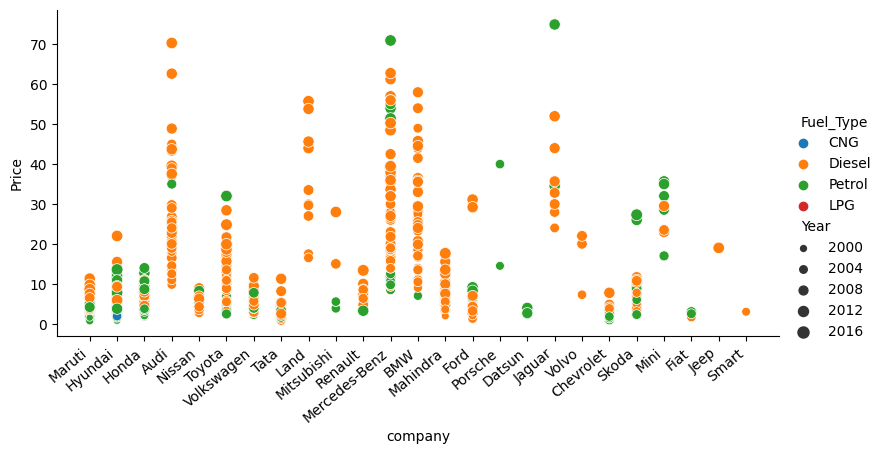

In [ ]:
ax=sns.relplot(x='company',y='Price',data=car,hue='Fuel_Type',size='Year',height=4,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

**Price to Company only**

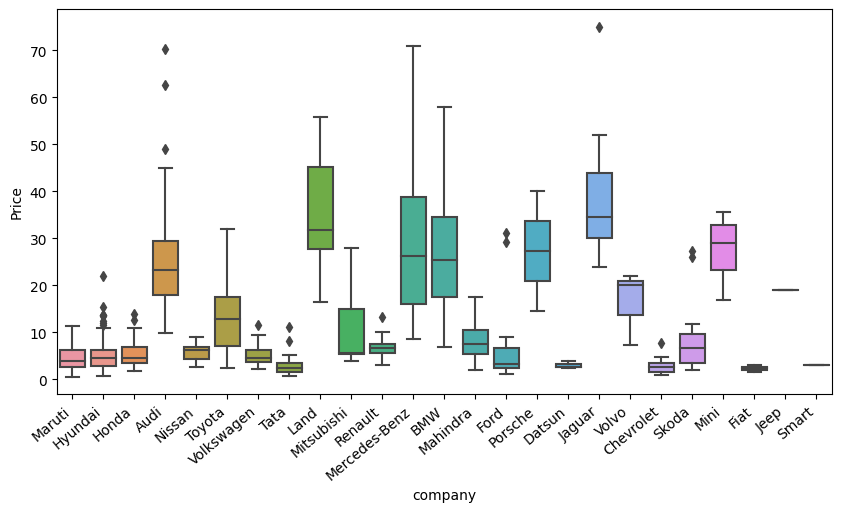

In [ ]:
plt.subplots(figsize=(10,5))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Year to price**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.4% of the points cannot be plac

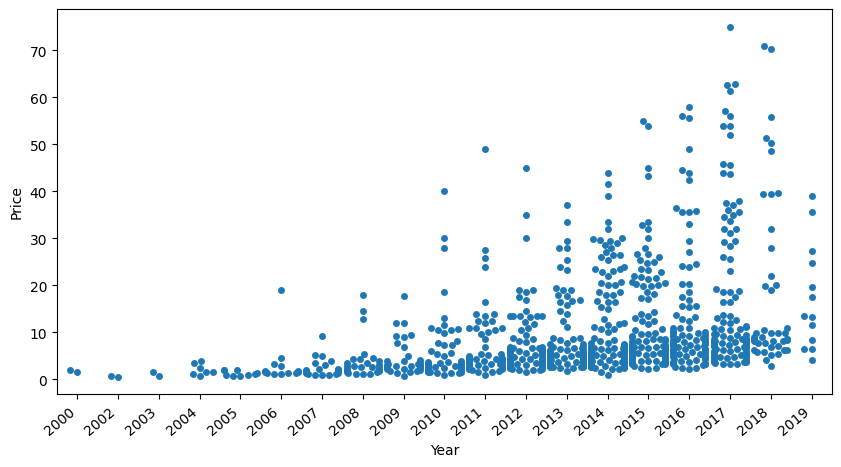

In [ ]:
plt.subplots(figsize=(10,5))
ax=sns.swarmplot(x='Year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 53.8% of the points cannot be plac

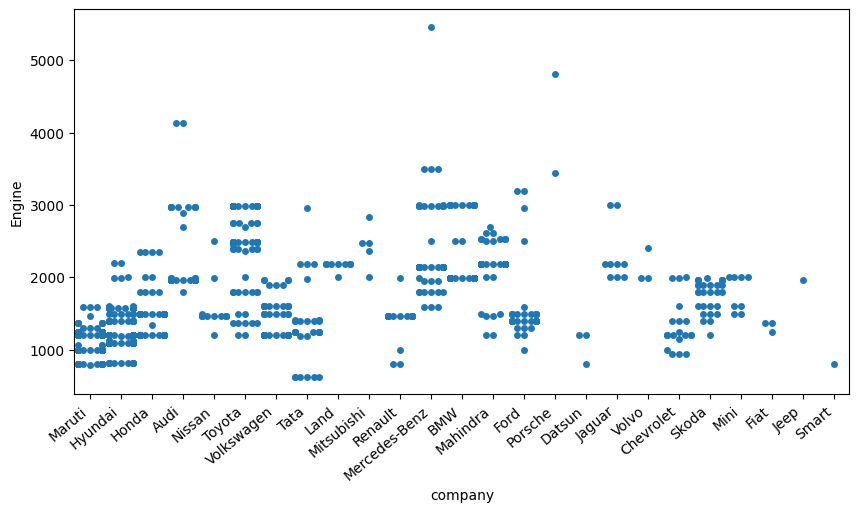

In [ ]:
plt.subplots(figsize=(10,5))
ax=sns.swarmplot(x='company',y='Engine',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Price to Kilometers**

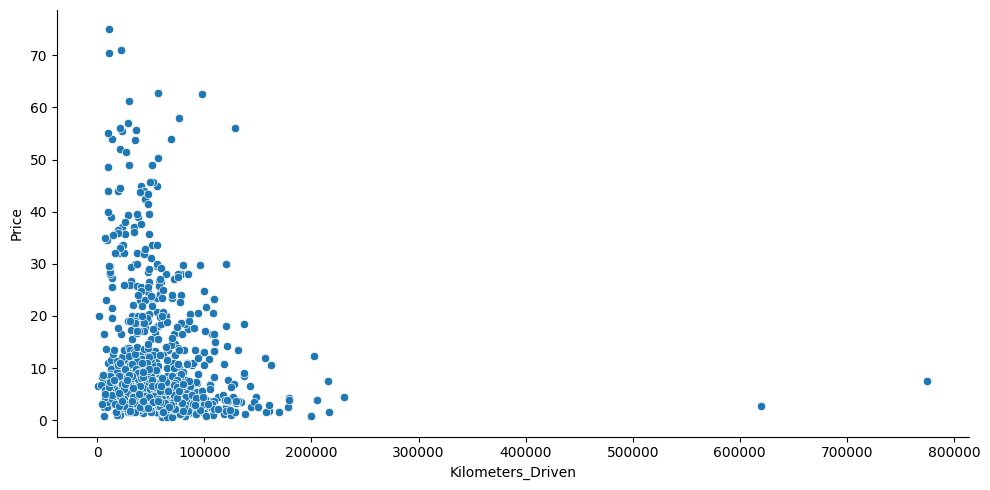

In [ ]:
sns.relplot(x='Kilometers_Driven',y='Price',data=car,height=5,aspect=2)

**price to fuel type**

<Axes: xlabel='Fuel_Type', ylabel='Price'>

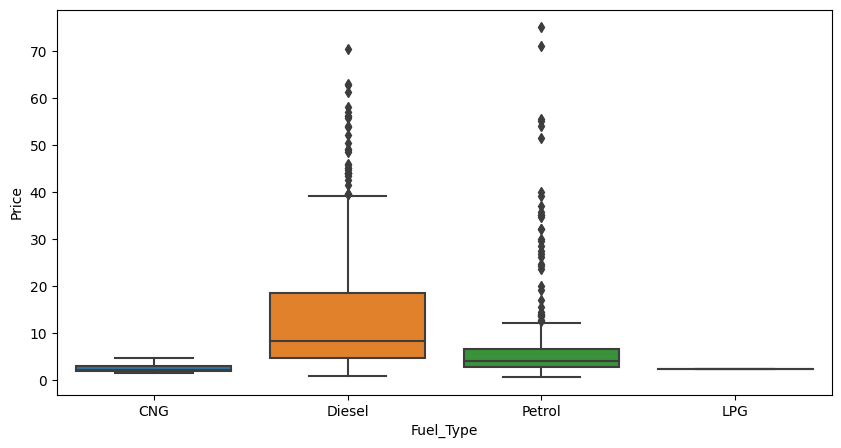

In [ ]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='Fuel_Type',y='Price',data=car)